# Network Graph Visualisation

In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [3]:
#Import countries relationship df

relationship_df = pd.read_csv('country_relationships.csv', index_col = 0)

In [4]:
relationship_df  #check

,target
source,
France,Russia
France,Russia
Russia,Germany
France,Russia
Russia,Germany
...,...
India,Singapore
India,Singapore
India,Singapore


In [8]:
#adding value by groupby

df_relationships_counted = (
    relationship_df
        .groupby(["source", "target"])
        .size()
        .reset_index(name="count")
)

In [10]:
df_relationships_counted.head(25)  #check

,source,target,count
0,Albania,Bulgaria,6
1,Albania,Ukraine,2
2,Algeria,Italy,5
3,Australia,Vietnam,4
4,Austria,Germany,1
5,Austria,Spain,2
6,Belarus,Libya,3
7,Belgium,France,6
8,Bulgaria,Poland,6
9,Cambodia,Kenya,6


In [11]:
#Creating a graph 

G = nx.from_pandas_edgelist(df_relationships_counted, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "count", 
                            create_using = nx.Graph())

## Graph Visualisation with networkx

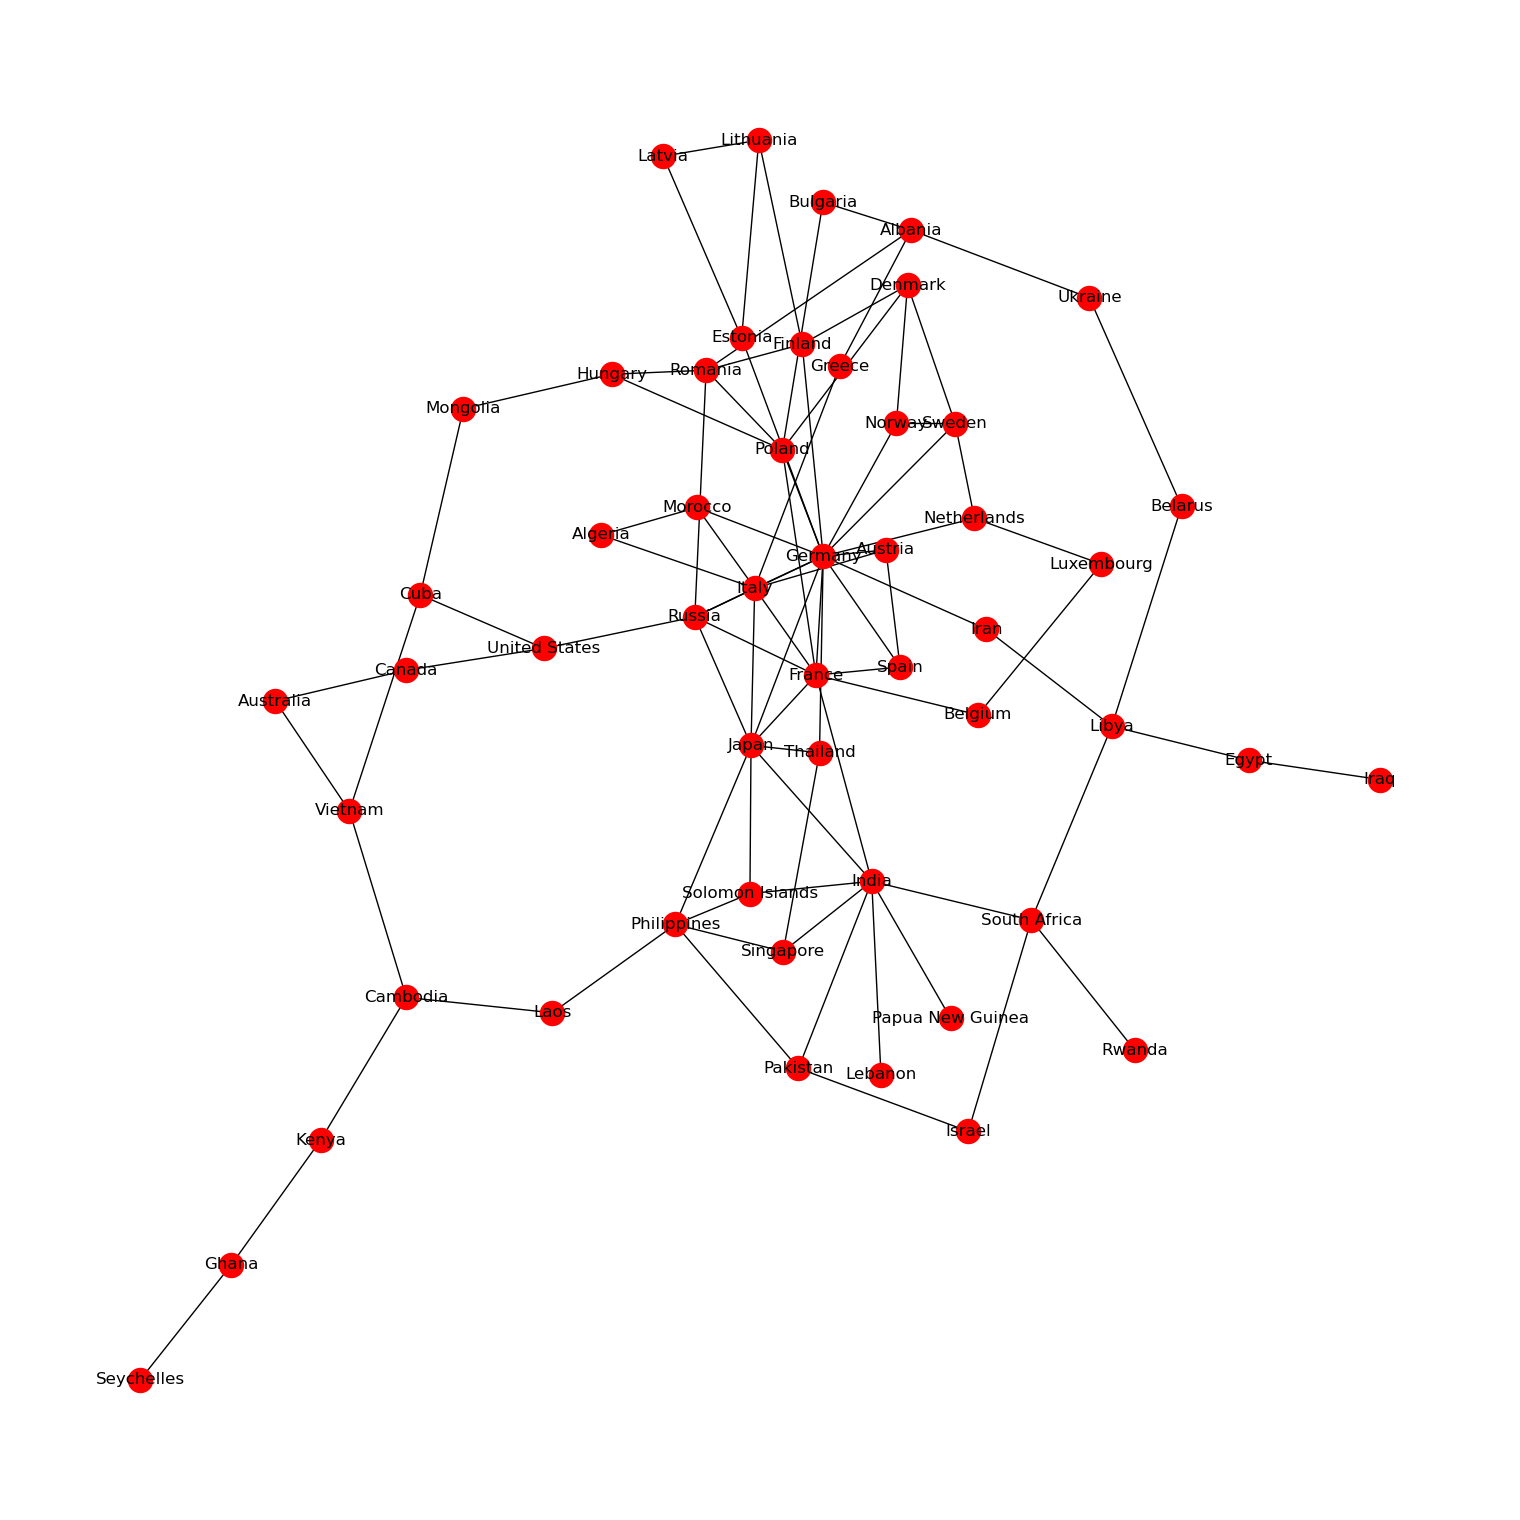

In [16]:
h = plt.figure(figsize = (15,15))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

In [17]:
h.savefig('20th_country_relationships.png')

## Graph Visualisation with pyvis

In [18]:
net=Network() 
net=Network(notebook=True, width="1000px", height="800px", bgcolor="#222222",  font_color="white"
)
#defining Object

node_degree = dict(G.degree)

nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("countries_network.html")

countries_network.html


## Leiden Algortihm

In [22]:
pip install cdlib

  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.2 MB 2.5 MB/s eta 0:00:02
   ------------- -------------------------- 1.0/3.2 MB 2.6 MB/s eta 0:00:01
   ------------------- -------------------- 1.6/3.2 MB 2.9 MB/s eta 0:00:01
   -------------------------- ------------- 2.1/3.2 MB 2.8 MB/s eta 0:00:01
   ----------------------------------- ---- 2.9/3.2 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 3.2/3.2 MB 2.8 MB/s  0:00:01
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 2.4 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.9 MB 2.5 MB/s eta 0:00:04
   ------

  DEPRECATION: Building 'python-louvain' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'python-louvain'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [23]:
pip install python-igraph leidenalg

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 2.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.8/2.0 MB 2.3 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/2.0 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 2.5 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
#import (conda took too long)

from cdlib import algorithms
coms=algorithms.leiden(G)

In [27]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [28]:
new_com=coms.to_node_community_map()

In [29]:
new_com  #check

defaultdict(list,
            {'India': [0],
             'Japan': [0],
             'Thailand': [0],
             'Pakistan': [0],
             'Singapore': [0],
             'South Africa': [0],
             'Israel': [0],
             'Philippines': [0],
             'Solomon Islands': [0],
             'Lebanon': [0],
             'Papua New Guinea': [0],
             'Rwanda': [0],
             'Australia': [1],
             'Vietnam': [1],
             'Cambodia': [1],
             'Kenya': [1],
             'Canada': [1],
             'Cuba': [1],
             'United States': [1],
             'Ghana': [1],
             'Seychelles': [1],
             'Mongolia': [1],
             'Laos': [1],
             'Algeria': [2],
             'Italy': [2],
             'Austria': [2],
             'Germany': [2],
             'Spain': [2],
             'France': [2],
             'Russia': [2],
             'Morocco': [2],
             'Ukraine': [3],
             'Belarus': [3],
     

In [30]:
#new_com dictionary

dict_com={k:v[0] for k,v in new_com.items()}

In [31]:
dict_com  #check

{'India': 0,
 'Japan': 0,
 'Thailand': 0,
 'Pakistan': 0,
 'Singapore': 0,
 'South Africa': 0,
 'Israel': 0,
 'Philippines': 0,
 'Solomon Islands': 0,
 'Lebanon': 0,
 'Papua New Guinea': 0,
 'Rwanda': 0,
 'Australia': 1,
 'Vietnam': 1,
 'Cambodia': 1,
 'Kenya': 1,
 'Canada': 1,
 'Cuba': 1,
 'United States': 1,
 'Ghana': 1,
 'Seychelles': 1,
 'Mongolia': 1,
 'Laos': 1,
 'Algeria': 2,
 'Italy': 2,
 'Austria': 2,
 'Germany': 2,
 'Spain': 2,
 'France': 2,
 'Russia': 2,
 'Morocco': 2,
 'Ukraine': 3,
 'Belarus': 3,
 'Libya': 3,
 'Egypt': 3,
 'Iraq': 3,
 'Iran': 3,
 'Albania': 4,
 'Bulgaria': 4,
 'Poland': 4,
 'Romania': 4,
 'Greece': 4,
 'Hungary': 4,
 'Belgium': 5,
 'Denmark': 5,
 'Norway': 5,
 'Sweden': 5,
 'Netherlands': 5,
 'Luxembourg': 5,
 'Estonia': 6,
 'Latvia': 6,
 'Lithuania': 6,
 'Finland': 6}

In [32]:
#community graph

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_communities_leiden.html")

20th_century_communities_leiden.html


## Notes

The Leiden communities in the country co-occurrence network make historical sense and depict well-known geopolitical patterns and events of the 20th century.

The communities reflect real geopolitical blocs: Europe, East-Europe, middle east and northern african regions, Asia, post-colonial countries including the british Commonwealth.

Many European countries appear in tightly connected subgroup/communities.
This fits history because Europe is central to both World Wars, the Cold War divide, and the formation of the EU.
Countries like Germany, France, Russia, Italy, Poland, etc. are major hubs connecting communities.

## Centraliyty Measures

### 20th Century Country Impact

In [33]:
degree_dict = nx.degree_centrality(G)
degree_dict

{'Albania': 0.07692307692307693,
 'Bulgaria': 0.038461538461538464,
 'Ukraine': 0.038461538461538464,
 'Algeria': 0.038461538461538464,
 'Italy': 0.15384615384615385,
 'Australia': 0.038461538461538464,
 'Vietnam': 0.057692307692307696,
 'Austria': 0.057692307692307696,
 'Germany': 0.2884615384615385,
 'Spain': 0.057692307692307696,
 'Belarus': 0.038461538461538464,
 'Libya': 0.07692307692307693,
 'Belgium': 0.038461538461538464,
 'France': 0.15384615384615385,
 'Poland': 0.11538461538461539,
 'Cambodia': 0.057692307692307696,
 'Kenya': 0.038461538461538464,
 'Canada': 0.038461538461538464,
 'Cuba': 0.057692307692307696,
 'United States': 0.057692307692307696,
 'Denmark': 0.07692307692307693,
 'Norway': 0.057692307692307696,
 'Sweden': 0.07692307692307693,
 'Egypt': 0.038461538461538464,
 'Iraq': 0.019230769230769232,
 'Estonia': 0.057692307692307696,
 'Latvia': 0.038461538461538464,
 'Lithuania': 0.057692307692307696,
 'Finland': 0.07692307692307693,
 'Romania': 0.09615384615384616,
 

In [35]:
degree_df=pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [36]:
degree_df.sort_values(by=['centrality'], ascending=False, inplace = True)

In [37]:
degree_df

,countries,centrality
8,Germany,0.288462
13,France,0.153846
4,Italy,0.153846
31,Japan,0.153846
30,India,0.153846
32,Russia,0.115385
14,Poland,0.115385
46,Philippines,0.096154
29,Romania,0.096154
0,Albania,0.076923


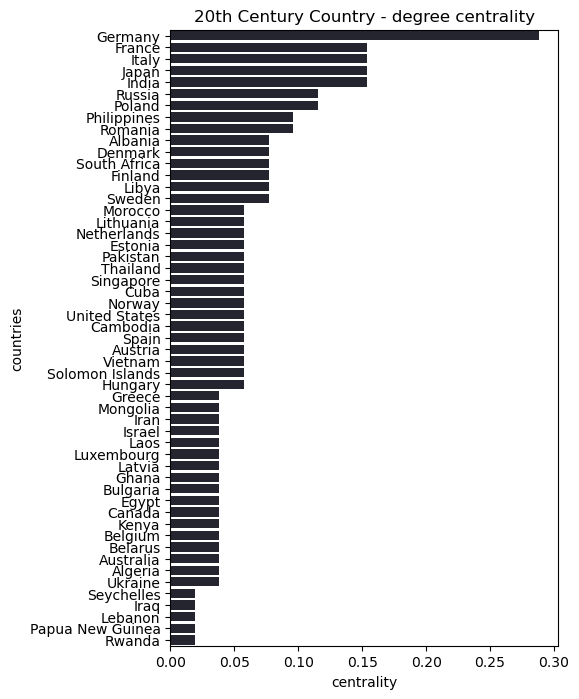

In [49]:
#centrality degree plot

plt.figure(figsize = (5, 8))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th Century Country - degree centrality")

## Notes

Germany is by far the most connected country, appearing with more countries than any other. This reflects its involvement across both World Wars, in inner European politics and Cold War involvement.

France, Italy, Japan, India, and Russia also show a high degree centrality, indicating on frequent co-occurrence with many countries across mutiple 20th-century events.

Countries such as the Philippines, Poland, Romania, Albania, Denmark, South Africa form a strong second tier, representing nations involved in regional wars,or significant geopolitical shifts (e.g. end of apartheid in South Africa).

Middle-range/tier countries (e.g. Sweden, Morocco, Lithuania, Pakistan, Thailand, Singapore, Cuba) have several connections but are not central hubs.

Low-centrality degree countries (Ruanda, Papua New Guinea, Lebanon, Iraq, the Seychelles) appear in fewer contexts and occupy more isolated positions in the event network.

### Closeness Centrality

In [50]:
closeness_dict=nx.closeness_centrality(G)
closeness_df=pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [51]:
closeness_df.sort_values(by=['centrality'], ascending=False, inplace=True)

In [52]:
closeness_df

,countries,centrality
8,Germany,0.412698
13,France,0.390977
31,Japan,0.390977
32,Russia,0.374101
4,Italy,0.363636
30,India,0.344371
14,Poland,0.342105
35,Thailand,0.325000
44,Iran,0.322981
46,Philippines,0.317073


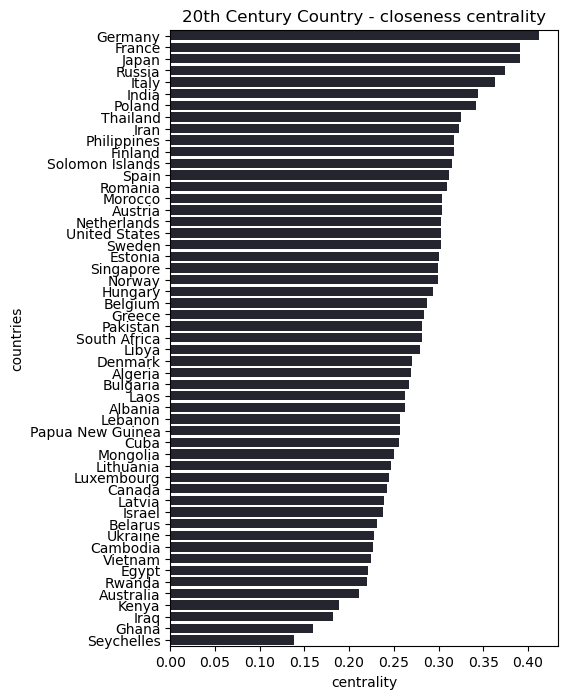

In [55]:
#closeness centrality plot

plt.figure(figsize = (5, 8))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x="centrality", y="countries",
    saturation=0.9, data=closeness_df).set_title("20th Century Country - closeness centrality")

## Notes

Germany, France, Japan, Russia, Italy, and India have the highest closeness centrality scores, which means they sit at the centre of the 20th-century event network.

This reflects their major roles in WWI, WWII, the Cold War, decolonization, and global diplomacy importance, making them consistently central in modern historical narratives.

A second group (Poland, Thailand, Iran, the Philippines, Finland, Spain, Morocco, Austria) shows countries with strong regional or conflict-related connections (e.g. WWII occupations, Cold War hotspots/involvement).

Countries with mid-high closeness scores (e.g., Netherlands, Sweden, Singapore, Belgium, Pakistan, South Africa) represent countries involved in many events but not global hubs or major players.

Low-closeness centrality countries (e.g. Seychelles, Ghana, Iraq, Kenya, Ruanda, Australia) appear more isolated in the dataset, participating less often in major historical events.

### Betweennes Centrality

In [56]:
betweenness_dict=nx.betweenness_centrality(G)
betweennes_df=pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [57]:
betweennes_df.sort_values(by=['centrality'], ascending=False, inplace=True)

In [58]:
betweennes_df

,countries,centrality
8,Germany,0.382723
31,Japan,0.205736
30,India,0.201086
46,Philippines,0.163601
32,Russia,0.160168
13,France,0.155524
15,Cambodia,0.126668
48,Laos,0.126102
11,Libya,0.121710
19,United States,0.111247


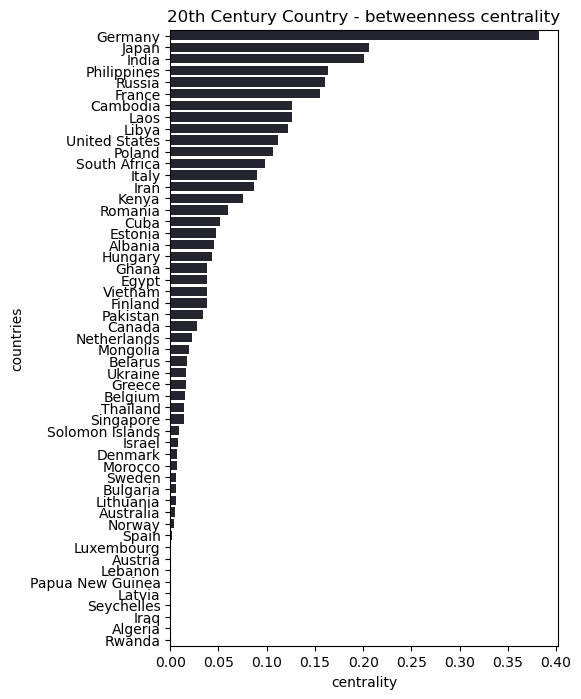

In [59]:
#Betweennes Centrality plot

plt.figure(figsize = (5, 8))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x="centrality", y="countries",
    saturation=0.9, data = betweennes_df).set_title("20th Century Country - betweenness centrality")

### Notes

Germany is the strongest global connector, reflecting its central role in both World Wars and the Cold War.

Japan and India act as major bridges between regions (Asia&West), consistent with WWII and decolonization processes.
The southeast asian countries(Philippines, Cambodia, Laos) rank high due to Cold War conflicts, especially the Vietnam War.

Russia and the U.S. are influential but less “bridging” because they appear as major rivals and not intermediaries.

African and smaller asian nations have moderate or low betweenness, indicating on more localized historical relationships with less global impact.

In [60]:
#saving

nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')